            Date        Open        High         Low     Volume       Close
0     14-08-2015   57.484790   58.398406   57.342469  171718000   58.237720
1     17-08-2015   58.274453   59.013611   58.026536  163538800   58.788651
2     18-08-2015   58.453501   58.917197   58.260678  138242800   58.485638
3     19-08-2015   58.301997   58.494820   57.650069  193146000   57.801575
4     20-08-2015   57.374601   57.498558   56.249794  274006400   56.718082
...          ...         ...         ...         ...        ...         ...
1495  23-07-2021  299.658540  301.995035  298.400415   71447400  301.675507
1496  26-07-2021  301.096392  304.211720  299.958083   72434100  302.534241
1497  27-07-2021  302.793811  302.973565  295.664509  104818600  298.100861
1498  28-07-2021  294.186727  298.500271  289.653510  118931200  294.526215
1499  29-07-2021  293.947087  297.661523  293.727415   56699500  295.844238

[1500 rows x 6 columns]


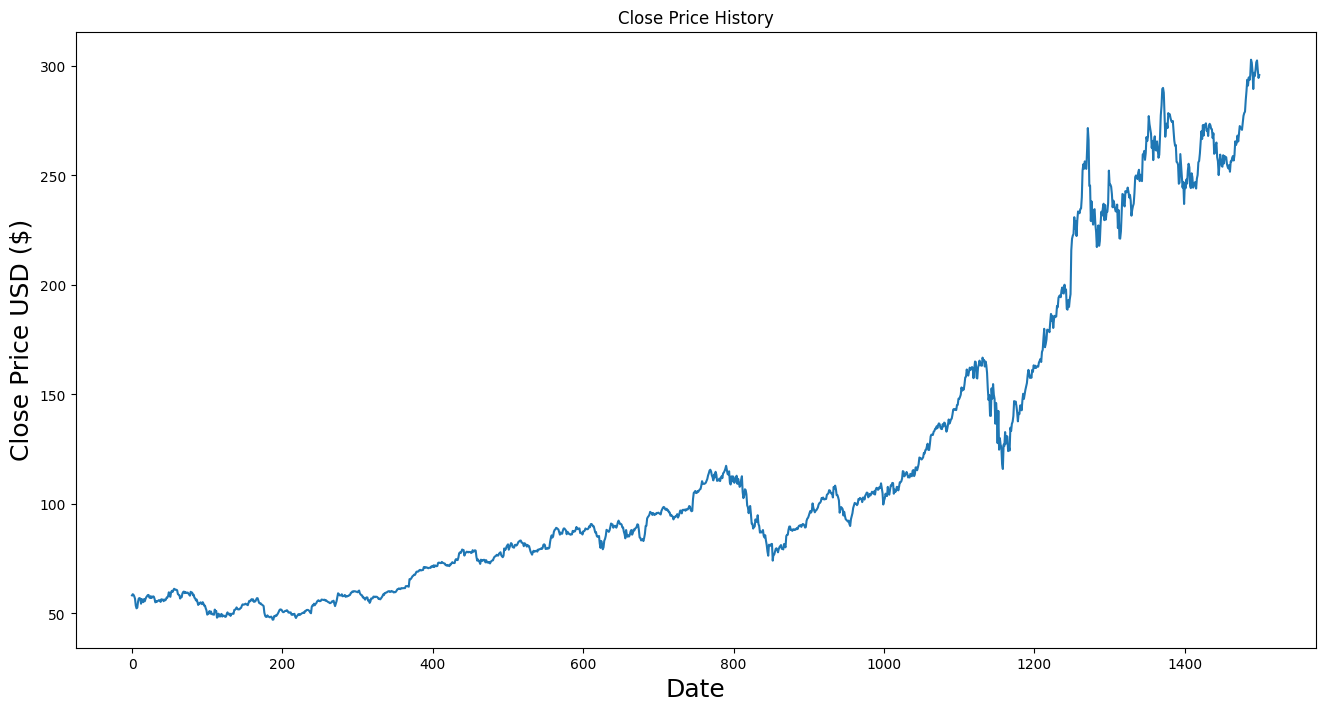

           Close
0      58.237720
1      58.788651
2      58.485638
3      57.801575
4      56.718082
...          ...
1495  301.675507
1496  302.534241
1497  298.100861
1498  294.526215
1499  295.844238

[1500 rows x 1 columns]
(1500, 1)
(1500, 1)
360


<ipython-input-1-87fa465b500e>:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


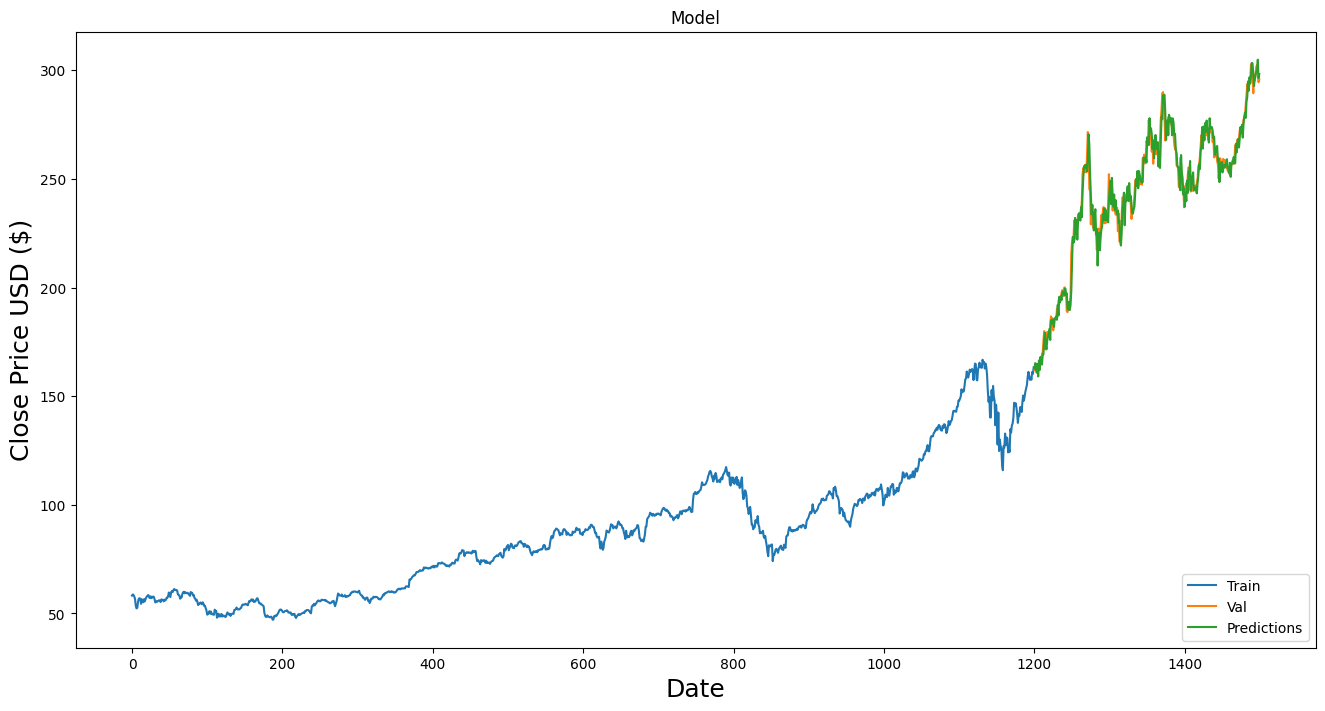

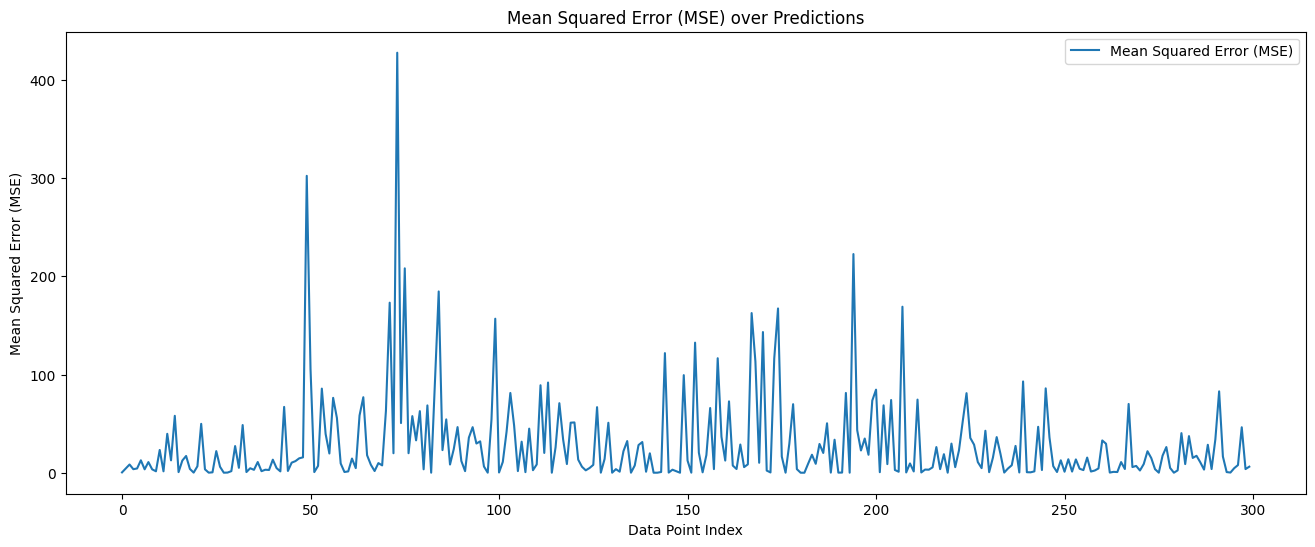

R2 Score (Accuracy): 0.9730926835871753


In [1]:
import math
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Dataset Generating
df = pd.read_csv('train.csv')
print(df)

df.shape

plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

# Create the 'Close Column'
data = df.filter(['Close'])
print(data)
# Convert to numpy
dataset = data.values
print(dataset.shape)
# The number of rows to be trained
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

# Scale the data
scalar = MinMaxScaler(feature_range=(0,1))
scaled_data = scalar.fit_transform(dataset)

print(scaled_data.shape)

# Create scaled data for training
train_data = scaled_data[0:training_data_len, :]

# Split data to x_train, x_test
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

# Convert the x_train, y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1]))

# Build the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(x_train, y_train)

# Creating the testing dataset
test_data = scaled_data[training_data_len-60:, :]
x_test = []
y_test = dataset[training_data_len:, :]
print(len(test_data))
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert x_test to numpy arrays
x_test = np.array(x_test)

# Reshape x_test
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1]))

# Prediction
predictions = model.predict(x_test)
predictions = scalar.inverse_transform(predictions.reshape(-1, 1))

# The root mean squared error
rmse = np.sqrt(np.mean((predictions - y_test)**2))
rmse

# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

# Show the valid and predicted prices
valid

# Additional Metrics
mse_values = (predictions - y_test)**2
plt.figure(figsize=(16, 6))
plt.plot(mse_values, label='Mean Squared Error (MSE)')
plt.title('Mean Squared Error (MSE) over Predictions')
plt.xlabel('Data Point Index')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.show()

from sklearn.metrics import r2_score

r2_accuracy = r2_score(y_test, predictions)
print('R2 Score (Accuracy):', r2_accuracy)
